In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle5 as pickle
from collections import defaultdict

In [21]:
def display_densiy(file, title):
    df = pickle.load(file)
    # REmove NaN values
    df = df.dropna()
    image_names = np.unique(df['image'] )

    # compute the average cell density
    densities=defaultdict(list)

    for image in image_names:
        image_data = df[df['image']==image].to_numpy()[:,[1,2]]
        for depth, value  in zip(image_data[:,0],image_data[:,1]):
            densities[depth].append(value)


    average={}
    median={}
    for key, value in densities.items():
        average[key] = np.average(value)
        median[key] = np.median(value)

    plt.figure(figsize=(3,3))
    for image in image_names:
        image_data = df[df['image']==image].to_numpy()[:,[1,2]]
        plt.plot(image_data[:,1], image_data[:,0])
    plt.plot(list(average.values()), list(average.keys()), linewidth=5, c='y', label='average values')
    plt.plot(list(median.values()),list(median.keys()), linewidth=5, c='black', label='median values')
    plt.title(f'{title} Cell density as a function of SSCX region percentage of depth.')
    plt.gca().set_ylabel("SSCX region percentage of depth")
    plt.gca().set_xlabel("Cell density cells/mm3")
    plt.gca().invert_yaxis()
    plt.legend()


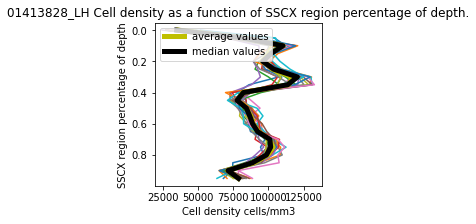

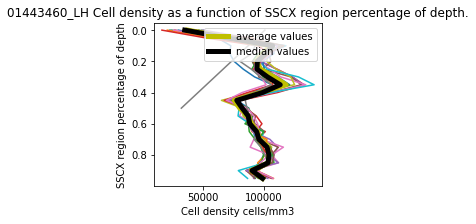

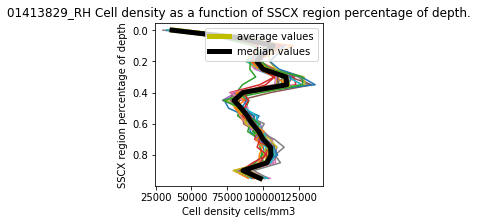

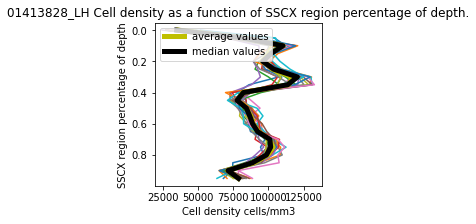

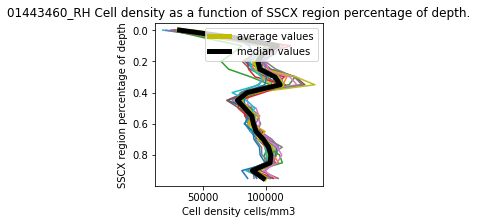

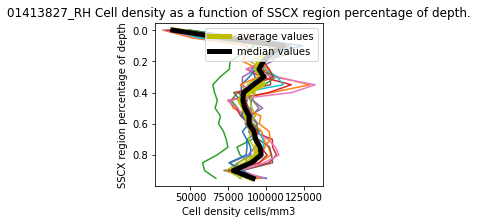

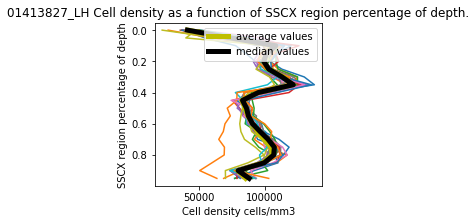

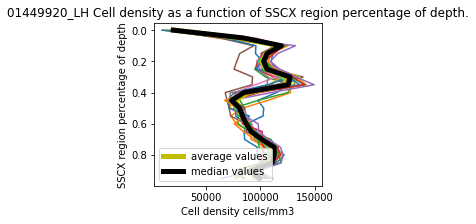

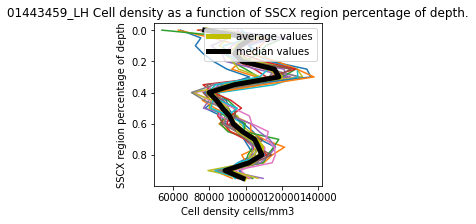

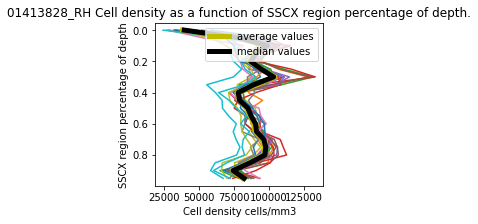

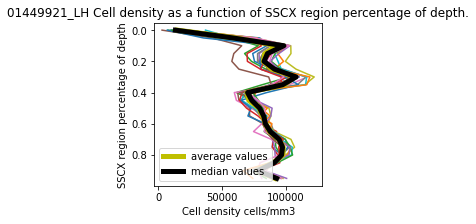

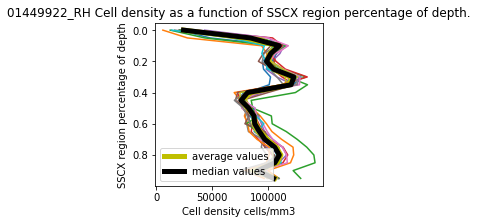

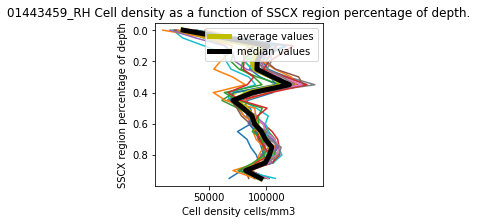

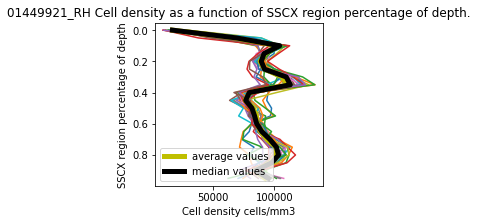

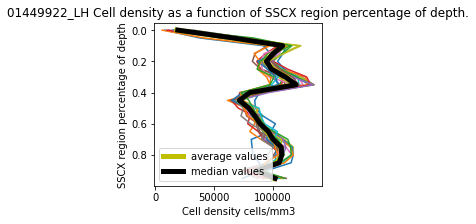

In [22]:
file_list = [('../../../Production/Results/01413828_LH/1690967717.pkl', '01413828_LH')
             ,('../../../Production/Results/01443460_LH/1690967717.pkl', '01443460_LH')
             ,('../../../Production/Results/01413829_RH/1690967717.pkl', '01413829_RH')
             ,('../../../Production/Results/01413828_LH/1690967717.pkl', '01413828_LH')
             ,('../../../Production/Results/01443460_RH/1690967717.pkl', '01443460_RH')
             ,('../../../Production/Results/01413827_RH/1690967717.pkl', '01413827_RH')
             ,('../../../Production/Results/01413827_LH/1690967717.pkl', '01413827_LH')
             ,('../../../Production/Results/01449920_LH/1690967717.pkl', '01449920_LH')
             ,('../../../Production/Results/01443459_LH/1690967717.pkl', '01443459_LH')
             ,('../../../Production/Results/01413828_RH/1690967717.pkl', '01413828_RH')
             ,('../../../Production/Results/01449921_LH/1690967717.pkl', '01449921_LH')
             ,('../../../Production/Results/01449922_RH/1690967717.pkl', '01449922_RH')
             ,('../../../Production/Results/01443459_RH/1690967717.pkl', '01443459_RH')
             ,('../../../Production/Results/01449921_RH/1690967717.pkl', '01449921_RH')
             ,('../../../Production/Results/01449922_LH/1690967717.pkl', '01449922_LH')]
for filename, title in file_list:
    file = open(filename, 'rb') 
    display_densiy(file, title)

In [6]:
file = open('../../../Production/Results/01413827_LH/1690967717.pkl', 'rb') 
df = pickle.load(file)
# REmove NaN values
df = df.dropna()
df.head

<bound method NDFrame.head of                        image  depth_percentage      densities
0   SLD_0000427.vsi - 20x_06              0.00   41705.287134
1   SLD_0000427.vsi - 20x_06              0.05   64624.930082
2   SLD_0000427.vsi - 20x_06              0.10  106064.165013
3   SLD_0000427.vsi - 20x_06              0.15  104367.688087
4   SLD_0000427.vsi - 20x_06              0.20  102782.449047
..                       ...               ...            ...
15  SLD_0000435.vsi - 20x_04              0.75  106845.481012
16  SLD_0000435.vsi - 20x_04              0.80  103046.169874
17  SLD_0000435.vsi - 20x_04              0.85   93688.536077
18  SLD_0000435.vsi - 20x_04              0.90   73382.394071
19  SLD_0000435.vsi - 20x_04              0.95   83110.049418

[440 rows x 3 columns]>